<a href="https://colab.research.google.com/github/omkarwazulkar/TimeSeriesForecasting/blob/main/Monthly_Armed_Robberies_In_Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
# Import dataset from Google Drive using read_csv
import pandas
from pandas import read_csv
data = '/content/drive/MyDrive/Dataset/Datasets/monthly-robberies.csv'

# Converting dataset into time series using (header = 0, index_col = 0, parse_dates = True, squeeze = True)
series = read_csv(
    data, 
    header = 0, 
    index_col = 0,
    parse_dates = True, 
    squeeze = True)
print(series)
print(type(series))

# Picking last year as validation and remaining as Training
split_point = len(series) - 12 
dataset, validation = series[0: split_point], series[split_point:]
print(type(dataset))

print('Dataset : %d, Validation : %d' %(len(dataset), len(validation)))

dataset.to_csv('dataset.csv', header = False)
validation.to_csv('validation.csv', header = False)

Month
1966-01-01     41
1966-02-01     39
1966-03-01     50
1966-04-01     40
1966-05-01     43
             ... 
1975-06-01    316
1975-07-01    398
1975-08-01    394
1975-09-01    431
1975-10-01    431
Name: Robberies, Length: 118, dtype: int64
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
Dataset : 106, Validation : 12


In [2]:
print(dataset)
print(validation)

Month
1966-01-01     41
1966-02-01     39
1966-03-01     50
1966-04-01     40
1966-05-01     43
             ... 
1974-06-01    287
1974-07-01    355
1974-08-01    460
1974-09-01    364
1974-10-01    487
Name: Robberies, Length: 106, dtype: int64
Month
1974-11-01    452
1974-12-01    391
1975-01-01    500
1975-02-01    451
1975-03-01    375
1975-04-01    372
1975-05-01    302
1975-06-01    316
1975-07-01    398
1975-08-01    394
1975-09-01    431
1975-10-01    431
Name: Robberies, dtype: int64


# **Test Harness and Baseline Model Peformance**

In [4]:
# Preparing a Test Harness
from pandas import read_csv
from math import sqrt
from sklearn.metrics import mean_squared_error
from math import sqrt

# Loading Data
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
history = [x for x in train]
predictions = list()
for i in range(len(test)):
  yhat = history[-1]
  predictions.append(yhat)
  obs = test[i]
  history.append(obs)
  print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))

# Performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=98.000, Expected=125.000
>Predicted=125.000, Expected=155.000
>Predicted=155.000, Expected=190.000
>Predicted=190.000, Expected=236.000
>Predicted=236.000, Expected=189.000
>Predicted=189.000, Expected=174.000
>Predicted=174.000, Expected=178.000
>Predicted=178.000, Expected=136.000
>Predicted=136.000, Expected=161.000
>Predicted=161.000, Expected=171.000
>Predicted=171.000, Expected=149.000
>Predicted=149.000, Expected=184.000
>Predicted=184.000, Expected=155.000
>Predicted=155.000, Expected=276.000
>Predicted=276.000, Expected=224.000
>Predicted=224.000, Expected=213.000
>Predicted=213.000, Expected=279.000
>Predicted=279.000, Expected=268.000
>Predicted=268.000, Expected=287.000
>Predicted=287.000, Expected=238.000
>Predicted=238.000, Expected=213.000
>Predicted=213.000, Expected=257.000
>Predicted=257.000, Expected=293.000
>Predicted=293.000, Expected=212.000
>Predicted=212.000, Expected=246.000
>Predicted=246.000, Expected=353.000
>Predicted=353.000, Expected=339.000
>P

In [5]:
series.describe()

count    106.000000
mean     173.103774
std      112.231133
min       29.000000
25%       74.750000
50%      144.500000
75%      271.750000
max      487.000000
Name: 1, dtype: float64

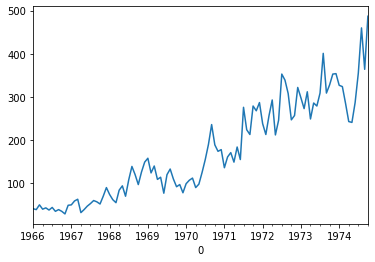

In [6]:
# Line Plot
from matplotlib import pyplot
series.plot()
pyplot.show()

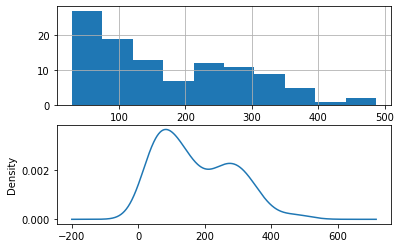

In [7]:
# Density Plot
pyplot.subplot(211)
series.hist()
pyplot.subplot(212)
series.plot(kind = 'kde')
pyplot.show()

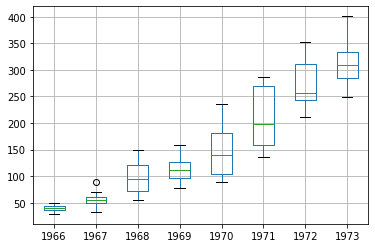

In [8]:
# Box and Whisker Plots
from pandas import DataFrame
from pandas import Grouper
groups = series['1966':'1973'].groupby(Grouper(freq = 'A'))
print(groups)
years = DataFrame()
for name, group in groups:
  years[name.year] = group.values
years.boxplot()
pyplot.show()

# **Manually Configured ARIMA**

In [10]:
from pandas import read_csv
from pandas import Series
from statsmodels.tsa.stattools import adfuller
import pandas.testing as tm

In [11]:
# Differenced Time Series
def difference(dataset):
  diff = list()
  for i in range(1, len(dataset)):
    value = dataset[i] - dataset[i - 1]
    diff.append(value)
  return Series(diff)

In [12]:
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
X = series.values
stationary = difference(X)
stationary.index = series.index[1:]
result = adfuller(stationary)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

# Creating a New Stationary File
stationary.to_csv('stationary.csv', header=False)

ADF Statistic: -3.980946
p-value: 0.001514
Critical Values:
	1%: -3.503
	5%: -2.893
	10%: -2.584


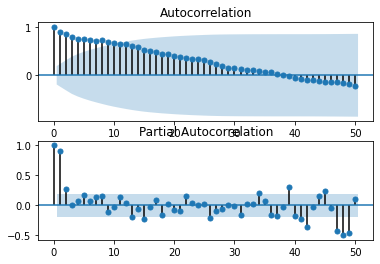

In [13]:
# ACF and PACF plots of time series
from pandas import read_csv
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

pyplot.figure()
pyplot.subplot(211)
plot_acf(series, lags=50, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(series, lags=50, ax=pyplot.gca())
pyplot.show()

# **Evaluating Manually Configured ARIMA**

In [15]:
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt

In [16]:
# Loading data
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

history = [x for x in train]
predictions = list()
for i in range(len(test)):
  # predict
  model = ARIMA(history, order=(0,1,2))
  model_fit = model.fit(disp=0)
  yhat = model_fit.forecast()[0]
  predictions.append(yhat)
  obs = test[i]
  history.append(obs)
  print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))

#  Performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=102.710, Expected=125.000
>Predicted=118.868, Expected=155.000
>Predicted=141.099, Expected=190.000
>Predicted=176.593, Expected=236.000
>Predicted=233.418, Expected=189.000
>Predicted=186.905, Expected=174.000
>Predicted=184.846, Expected=178.000
>Predicted=183.763, Expected=136.000
>Predicted=146.180, Expected=161.000
>Predicted=171.279, Expected=171.000
>Predicted=170.196, Expected=149.000
>Predicted=154.425, Expected=184.000
>Predicted=185.708, Expected=155.000
>Predicted=157.284, Expected=276.000
>Predicted=245.280, Expected=224.000
>Predicted=222.242, Expected=213.000
>Predicted=219.698, Expected=279.000
>Predicted=261.506, Expected=268.000
>Predicted=264.287, Expected=287.000
>Predicted=282.759, Expected=238.000
>Predicted=255.843, Expected=213.000
>Predicted=235.189, Expected=257.000
>Predicted=257.622, Expected=293.000
>Predicted=280.345, Expected=212.000
>Predicted=235.564, Expected=246.000
>Predicted=255.342, Expected=353.000
>Predicted=318.613, Expected=339.000
>

# **Automatically Configured ARIMA**

In [17]:
# Evaluate ARIMA Models

def evaluate_arima_model(X, arima_order):
  # prepare training dataset
  X = X.astype('float32')
  train_size = int(len(X) * 0.50)
  train, test = X[0:train_size], X[train_size:]
  history = [x for x in train]
  # make predictions
  predictions = list()
  for t in range(len(test)):
    model = ARIMA(history, order=arima_order)
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(test[t])
  # calculate out of sample error
  rmse = sqrt(mean_squared_error(test, predictions))
  return rmse

In [18]:
# Evaluating and Finding the best fit of (p, d, q)
def evaluate_models(dataset, p_values, d_values, q_values):
  dataset = dataset.astype('float32')
  best_score, best_cfg = float("inf"), None
  for p in p_values:
    for d in d_values:
      for q in q_values:
        order = (p,d,q)
        try:
          rmse = evaluate_arima_model(dataset, order)
          if rmse < best_score:
            best_score, best_cfg = rmse, order
          print('ARIMA%s RMSE=%.3f' % (order,rmse))
        except:
          continue
  print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [ ]:
import warnings

series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = range(0,13)
d_values = range(0, 4)
q_values = range(0, 13)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=154.962
ARIMA(0, 0, 1) RMSE=99.360
ARIMA(0, 1, 0) RMSE=51.827
ARIMA(0, 1, 1) RMSE=50.417
ARIMA(0, 1, 2) RMSE=49.821
ARIMA(0, 2, 0) RMSE=80.804
ARIMA(0, 2, 1) RMSE=52.456
ARIMA(1, 0, 0) RMSE=53.243
ARIMA(1, 1, 0) RMSE=50.582
ARIMA(1, 2, 0) RMSE=68.672
ARIMA(2, 0, 0) RMSE=52.032
ARIMA(2, 2, 0) RMSE=61.384


Found the Best Fit as (0,1,2) and using it is as the final paramters to find the residual errors

In [ ]:
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
import pandas.testing as tm
from matplotlib import pyplot

In [2]:
# Data
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

history = [x for x in train]
predictions = list()
for i in range(len(test)):
  # predict
  model = ARIMA(history, order=(0,1,2))
  model_fit = model.fit(disp=0)
  yhat = model_fit.forecast()[0]
  predictions.append(yhat)
  # observation
  obs = test[i]
  history.append(obs)

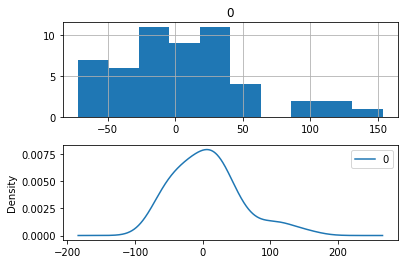

In [3]:
# Residual Errors plot
# Residual Errors for ARIMA model

residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())
pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

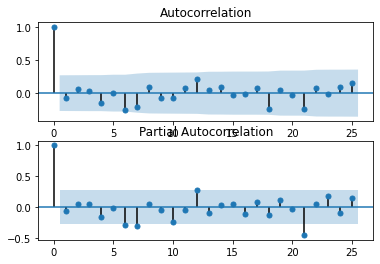

In [10]:
# ACF and PACF Plots
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

pyplot.figure()
pyplot.subplot(211)
plot_acf(residuals, lags=25, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(residuals, lags=25, ax=pyplot.gca())
pyplot.show()

Lambda: 0.260060


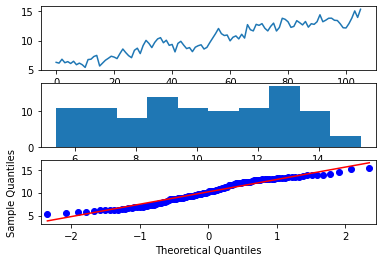

In [5]:
# Plots of Box - Cox Dataset
from pandas import read_csv
from scipy.stats import boxcox
from matplotlib import pyplot
from statsmodels.graphics.gofplots import qqplot

series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
X = series.values
transformed, lam = boxcox(X)
print('Lambda: %f' % lam)

pyplot.figure(1)
# Line plot
pyplot.subplot(311)
pyplot.plot(transformed)

# Histogram
pyplot.subplot(312)
pyplot.hist(transformed)

# Q-Q plot
pyplot.subplot(313)
qqplot(transformed, line='r', ax=pyplot.gca())
pyplot.show()

# **Finalizing and Saving the Model**

In [6]:
# Finalising and Saving the Model
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats import boxcox
import numpy

def __getnewargs__(self):
  return ((self.endog),(self.k_lags, self.k_diff, self.k_ma))
  
ARIMA.__getnewargs__ = __getnewargs__

# Data
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
X = series.values
X = X.astype('float32')

# Transformed Data
transformed, lam = boxcox(X)

# Fit Model
model = ARIMA(transformed, order=(0,1,2))
model_fit = model.fit(disp=0)

# Saving Model
model_fit.save('model.pkl')
numpy.save('model_lambda.npy', [lam])

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


# **Loading the Model and Predicting on Data**

In [7]:
from statsmodels.tsa.arima_model import ARIMAResults
from math import exp
from math import log
import numpy

In [8]:
# Inverted Box - Cox Transform
def boxcox_inverse(value, lam):
  if lam == 0:
    return exp(value)
  return exp(log(lam * value + 1) / lam)

In [9]:
# Loading Model
model_fit = ARIMAResults.load('model.pkl')
lam = numpy.load('model_lambda.npy')

yhat = model_fit.forecast()[0]
yhat = boxcox_inverse(yhat, lam)
print('Predicted: %.3f' % yhat)

Predicted: 452.039


# **Evaluating the Final model on the Validation Dataset**

In [13]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from scipy.stats import boxcox
from sklearn.metrics import mean_squared_error
from math import sqrt
from math import exp
from math import log
import numpy

In [14]:
# Laoding Train Datasets
dataset = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
X = dataset.values.astype('float32')
history = [x for x in X]

# Loading Validation Dataset
validation = read_csv('validation.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
y = validation.values.astype('float32')

In [15]:
# Loading Model
model_fit = ARIMAResults.load('model.pkl')
lam = numpy.load('model_lambda.npy')

predictions = list()
yhat = model_fit.forecast()[0]
yhat = boxcox_inverse(yhat, lam)
predictions.append(yhat)
history.append(y[0])
print('>Predicted=%.3f, Expected=%.3f' % (yhat, y[0]))

>Predicted=452.039, Expected=452.000


In [16]:
# Forecasts 
for i in range(1, len(y)):
  transformed, lam = boxcox(history)
  if lam < -5:
    transformed, lam = history, 1
  model = ARIMA(transformed, order=(0,1,2))
  model_fit = model.fit(disp=0)
  yhat = model_fit.forecast()[0]
  yhat = boxcox_inverse(yhat, lam)
  predictions.append(yhat)
  obs = y[i]
  history.append(obs)
  print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


>Predicted=423.097, Expected=391.000
>Predicted=408.373, Expected=500.000
>Predicted=482.451, Expected=451.000
>Predicted=445.937, Expected=375.000
>Predicted=413.883, Expected=372.000
>Predicted=413.210, Expected=302.000
>Predicted=355.157, Expected=316.000
>Predicted=363.514, Expected=398.000
>Predicted=406.362, Expected=394.000
>Predicted=394.186, Expected=431.000
>Predicted=428.175, Expected=431.000


RMSE: 53.078


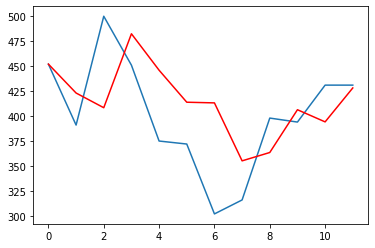

In [17]:
# Performance
rmse = sqrt(mean_squared_error(y, predictions))
print('RMSE: %.3f' % rmse)
pyplot.plot(y)
pyplot.plot(predictions, color='red')
pyplot.show()